# Random forest

In [5]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader("data_import", "../../utils/data_import.py")
data_import = loader.load_module()

loader = importlib.machinery.SourceFileLoader("model_evaluator", "../../utils/model_evaluator.py")
model_evaluator = loader.load_module()

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

## Testing random_state

Test to determine the best value for *random_state* parameter

In [11]:
clf = RandomForestClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)

acc: 0.9981971506973581
fnr: 0.0022522522522522522


In [10]:
clf = RandomForestClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)

acc: 0.9980839980617897
fnr: 0.0024774774774774773


With random_state=0 is better

## Testing number of trees

Test to determine the best value for *n_estimators* parameter

In [12]:
for i in range(50,150,10):
    clf = RandomForestClassifier(n_estimators=i)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("Number of trees " + str(i))
    print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
    print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)
    print("-----------------")

Number of trees 50
acc: 0.9981407014952339
fnr: 0.0022522522522522527
-----------------
Number of trees 60
acc: 0.99814073329742
fnr: 0.0022522522522522522
-----------------
Number of trees 70
acc: 0.9980278664000242
fnr: 0.0024774774774774773
-----------------
Number of trees 80
acc: 0.9979147139517881
fnr: 0.002815315315315315
-----------------
Number of trees 90
acc: 0.9980843477626916
fnr: 0.002364864864864865
-----------------
Number of trees 100
acc: 0.9980277709386265
fnr: 0.0024774774774774773
-----------------
Number of trees 110
acc: 0.998140733002117
fnr: 0.0022522522522522522
-----------------
Number of trees 120
acc: 0.9980278979435016
fnr: 0.0024774774774774778
-----------------
Number of trees 130
acc: 0.9980278347586211
fnr: 0.0024774774774774778
-----------------
Number of trees 140
acc: 0.9980844745337307
fnr: 0.0022522522522522522
-----------------


Best is 100

## Testing bootstrap

Test to determine the best value for *bootstrap* parameter

In [13]:
clf = RandomForestClassifier(bootstrap = False)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)

acc: 0.9978587093926121
fnr: 0.002702702702702703


In [14]:
clf = RandomForestClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)

acc: 0.9980278665253005
fnr: 0.0024774774774774773


bootstrap = True is better

## Testing criterion

Test to determine the best value for *criterion* parameter

In [16]:
for crit in ["gini", "entropy", "log_loss"]:
    clf = RandomForestClassifier(random_state=0, criterion=crit)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("criterion " + crit)
    print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
    print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)
    print("-----------------")

criterion gini
acc: 0.9981971506973581
fnr: 0.0022522522522522522
-----------------
criterion entropy
acc: 0.997858423752924
fnr: 0.002815315315315315
-----------------
criterion log_loss
acc: 0.997858423752924
fnr: 0.002815315315315315
-----------------


Gini is the best

## Testing max_depth

Test to determine the best value for *max_depth* parameter

In [11]:
fn = []
acc = []
k=5
for m in range(2,20,1):
    clf = RandomForestClassifier(random_state=0, max_depth=m)
    
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=k)
    
    acc.append(sum(kfold_scores_npv['test_accuracy_score'])/k)
    fn.append(sum(kfold_scores_npv['test_false_neg'])/k)

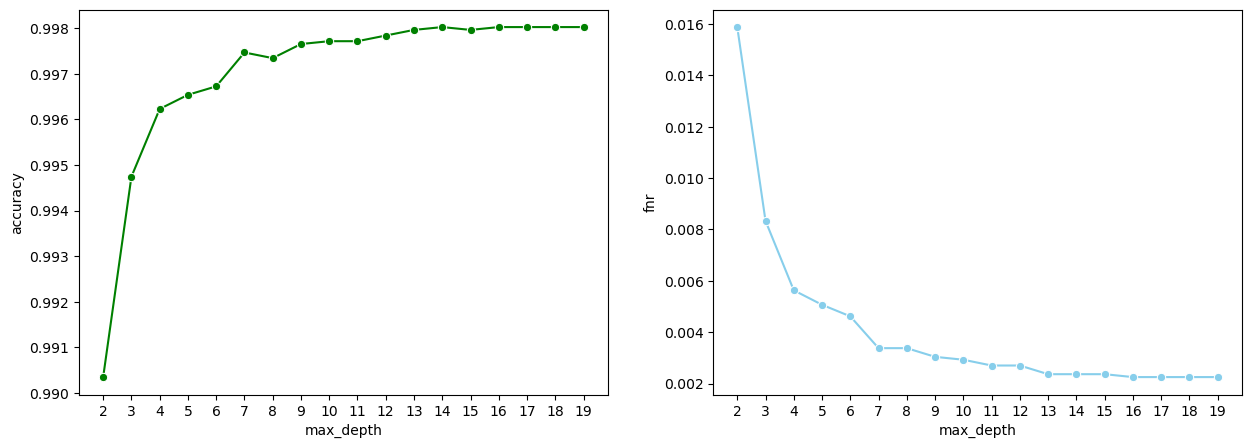

In [12]:
import seaborn as sns
x = np.arange(2, 20, 1)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
g_acc_2 = sns.lineplot(ax=axes[0], x=x, y=acc, marker="o", errorbar=None, legend=True, color='green')
g_fnr_2 = sns.lineplot(ax=axes[1], x=x, y=fn, marker="o", errorbar=None, legend=True, color='skyblue')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('accuracy')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('fnr')

axes[1].set_xticks(x)
axes[1].set_xticks(x)

plt.show()

Best max_depth 16

In [ ]:
for i in range(0, 18):
    print("Depth ",i+2)
    print("Accuracy: ",acc[i])
    print("False neg: ",fn[i])

Depth  2
Accuracy:  0.9903505152588268
False neg:  0.01587837837837838
Depth  3
Accuracy:  0.9947421850386811
False neg:  0.008333333333333333
Depth  4
Accuracy:  0.9962267402813556
False neg:  0.00563063063063063
Depth  5
Accuracy:  0.9965360313908764
False neg:  0.005067567567567567
Depth  6
Accuracy:  0.9967216366624259
False neg:  0.004617117117117117
Depth  7
Accuracy:  0.9974638855907912
False neg:  0.0033783783783783786
Depth  8
Accuracy:  0.9973401997528196
False neg:  0.0033783783783783786
Depth  9
Accuracy:  0.9976494908623404
False neg:  0.0030405405405405407
Depth  10
Accuracy:  0.9977113337813263
False neg:  0.002927927927927928
Depth  11
Accuracy:  0.9977113529099743
False neg:  0.002702702702702703
Depth  12
Accuracy:  0.9978350770052418
False neg:  0.002702702702702703
Depth  13
Accuracy:  0.9979587628432134
False neg:  0.002364864864864865
Depth  14
Accuracy:  0.9980206440194952
False neg:  0.002364864864864865
Depth  15
Accuracy:  0.9979587819718614
False neg:  0.0023

- 16 is the first best value of false rate
- 16  is the first best value of accuracy

## Final conclusion

Testing the final model with proper parameters on *testing set*

In [18]:
clf = RandomForestClassifier(random_state=0, max_depth=16)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)

print("Train score")
print("fnr: ",sum(kfold_scores_npv['test_false_neg'])/5)
print("acc: ",sum(kfold_scores_npv['test_accuracy_score'])/5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold_scores_npv = model_evaluator.metrics_function(y_test, y_pred)
print("\nTest score")
print("fnr: ",kfold_scores_npv['false_neg'])
print("acc: ",kfold_scores_npv['accuracy_score'])

Train score
fnr:  0.0022522522522522522
acc:  0.9980206248908472

Test score
fnr:  0.0013513513513513514
acc:  0.9990103908955963
